In [60]:
import pandas as pd
import warnings
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

# warning 없애기
warnings.filterwarnings("ignore")

# 글씨체 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


df = pd.read_csv('C:/Users/wndus/OneDrive/바탕 화면/관광지추천/2차_전처리.csv', encoding = 'utf-8')
df

,Unnamed: 0,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,"문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)",문9-3. 총 체재기간_61일 이상 결측,숙박시설_그룹,여행동반자_그룹,방문 지역 수,주요 체재 지역
0,0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,40.49,27.0,1. 호텔+7. 친척 또는 친구 집,혼자형,2,서울
1,5,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,228.02,5.0,1. 호텔,친구형,1,서울
2,6,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,204.30,7.0,1. 호텔,가족형,2,서울
3,8,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,219.91,8.0,1. 호텔,가족형,3,서울
4,9,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,167.08,8.0,1. 호텔,친구형,2,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,16190,21569.0,1.0,1.0,2.0,1,1.0,5.0,3.0,6.0,95.40,5.0,1. 호텔,가족형,1,제주
9648,16191,21570.0,1.0,1.0,4.0,1,1.0,1.0,12.0,7.0,154.33,6.0,1. 호텔,친구형,1,제주
9649,16192,21571.0,1.0,1.0,3.0,1,1.0,5.0,3.0,1.0,962.46,5.0,1. 호텔,친구형,1,제주
9650,16194,21573.0,1.0,2.0,4.0,1,2.0,5.0,1.0,1.0,89.44,4.0,1. 호텔,친구형,1,제주


# 1. 1인 1일 지출경비

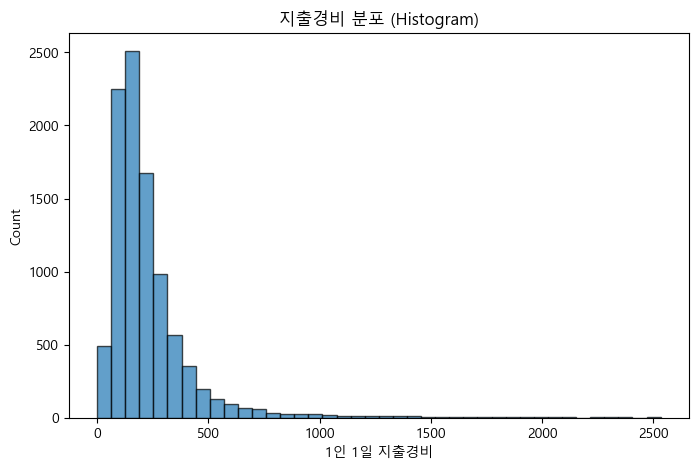

In [61]:
target_col = '문10. 1인 1일 지출경비(영향치 결측, 61일 이상 결측, 국제교통비 제외)'

plt.figure(figsize=(8,5))
plt.hist(df[target_col], bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('1인 1일 지출경비')
plt.ylabel('Count')
plt.title('지출경비 분포 (Histogram)')
plt.show()


In [62]:
quantiles = np.arange(0, 1.01, 0.05)   # 0%, 5%, 10%, ..., 100%
q_table = df[target_col].quantile(quantiles)

q_df = q_table.reset_index()
q_df.columns = ['Quantile', 'Value']
q_df

,Quantile,Value
0,0.00,0.0000
1,0.05,62.9400
2,0.10,79.8850
3,0.15,93.3375
4,0.20,106.0800
5,0.25,118.1350
6,0.30,130.0900
7,0.35,141.0150
8,0.40,152.5000
9,0.45,165.0875


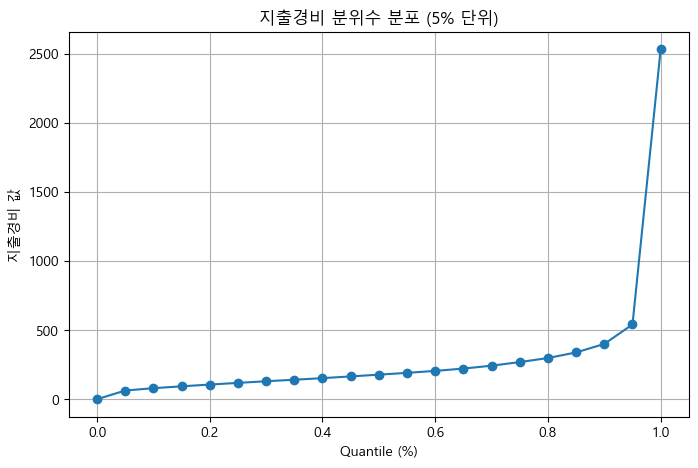

In [63]:
plt.figure(figsize=(8,5))
plt.plot(q_df['Quantile'], q_df['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('지출경비 값')
plt.title('지출경비 분위수 분포 (5% 단위)')
plt.grid(True)
plt.show()

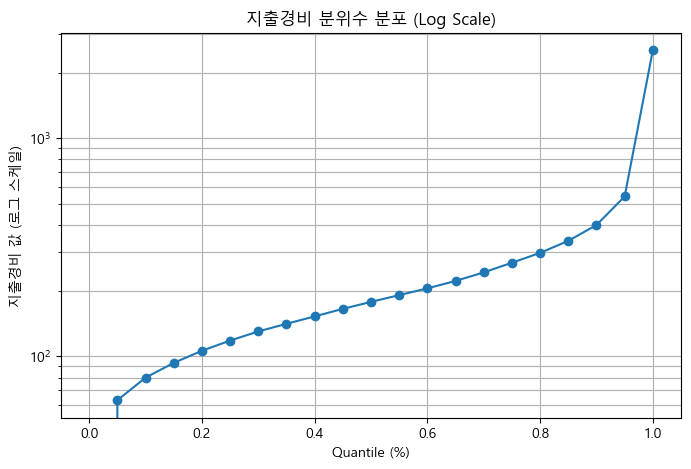

In [64]:
plt.figure(figsize=(8,5))
plt.plot(q_df['Quantile'], q_df['Value'], marker='o')
plt.yscale('log')
plt.xlabel('Quantile (%)')
plt.ylabel('지출경비 값 (로그 스케일)')
plt.title('지출경비 분위수 분포 (Log Scale)')
plt.grid(True, which='both')
plt.show()


# 로그로 그려봤는데 사실 의미는 없어보여서 패스

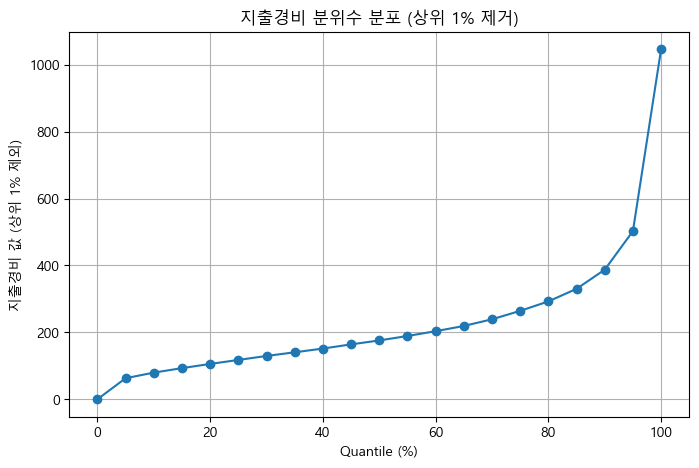

In [65]:
# 상위 1% cutoff
cut = df[target_col].quantile(0.99)

# 상위 1% 제외한 데이터로 재분석
df_trim = df[df[target_col] <= cut]

quantiles = np.arange(0, 1.01, 0.05)
q_table_trim = df_trim[target_col].quantile(quantiles)

q_df_trim = q_table_trim.reset_index()
q_df_trim.columns = ['Quantile', 'Value']
q_df_trim['Quantile'] = q_df_trim['Quantile'] * 100

plt.figure(figsize=(8,5))
plt.plot(q_df_trim['Quantile'], q_df_trim['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('지출경비 값 (상위 1% 제외)')
plt.title('지출경비 분위수 분포 (상위 1% 제거)')
plt.grid(True)
plt.show()


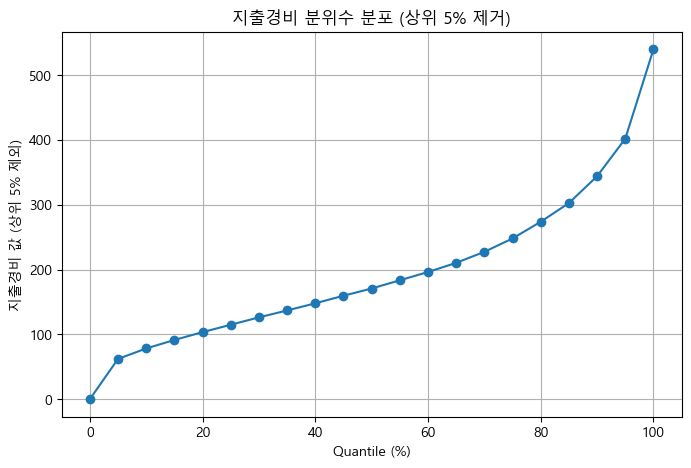

In [66]:
# 상위 5% cutoff
cut = df[target_col].quantile(0.95)

# 상위 1% 제외한 데이터로 재분석
df_trim = df[df[target_col] <= cut]

quantiles = np.arange(0, 1.01, 0.05)
q_table_trim = df_trim[target_col].quantile(quantiles)

q_df_trim = q_table_trim.reset_index()
q_df_trim.columns = ['Quantile', 'Value']
q_df_trim['Quantile'] = q_df_trim['Quantile'] * 100

plt.figure(figsize=(8,5))
plt.plot(q_df_trim['Quantile'], q_df_trim['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('지출경비 값 (상위 5% 제외)')
plt.title('지출경비 분위수 분포 (상위 5% 제거)')
plt.grid(True)
plt.show()


In [67]:
# q_df 는 다음 형태로 이미 존재한다:
# Quantile | Value

q = q_df['Quantile'].values
v = q_df['Value'].values

# 인접 분위수 간 차이 계산
diff = np.diff(v)  # Value 차이
step = np.diff(q)  # Quantile 차이 (여기서는 전부 5씩)

# 기울기(증가량) = diff / step 이지만 step은 일정하므로 diff 자체로 비교 가능
slope = diff / step

# 구간 테이블 생성
slope_df = pd.DataFrame({
    'q_start': q[:-1],
    'q_end': q[1:],
    'v_start': v[:-1],
    'v_end': v[1:],
    'diff': diff,
    'slope': slope
})

# 기울기 큰 순으로 7개 구간 추출
top7 = slope_df.reindex(slope_df['slope'].abs().sort_values(ascending=False).index).head(7)

top7


,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,540.9375,2532.5000,1991.5625,39831.25
18,0.90,0.95,400.0000,540.9375,140.9375,2818.75
0,0.00,0.05,0.0000,62.9400,62.9400,1258.80
17,0.85,0.90,338.5600,400.0000,61.4400,1228.80
16,0.80,0.85,298.1400,338.5600,40.4200,808.40
15,0.75,0.80,268.7500,298.1400,29.3900,587.80
14,0.70,0.75,242.5800,268.7500,26.1700,523.40


In [68]:
slope_df.reindex(slope_df['slope'].abs().sort_values(ascending=False).index)


# 90 ~ 100 % 
# 65 ~ 90 %
# 55 ~ 65 %
# 15 ~ 55 % 
# 5 ~ 15 %
# 0 ~ 5 %

,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,540.9375,2532.5000,1991.5625,39831.25
18,0.90,0.95,400.0000,540.9375,140.9375,2818.75
0,0.00,0.05,0.0000,62.9400,62.9400,1258.80
17,0.85,0.90,338.5600,400.0000,61.4400,1228.80
16,0.80,0.85,298.1400,338.5600,40.4200,808.40
15,0.75,0.80,268.7500,298.1400,29.3900,587.80
14,0.70,0.75,242.5800,268.7500,26.1700,523.40
13,0.65,0.70,221.7100,242.5800,20.8700,417.40
1,0.05,0.10,62.9400,79.8850,16.9450,338.90
12,0.60,0.65,205.0100,221.7100,16.7000,334.00


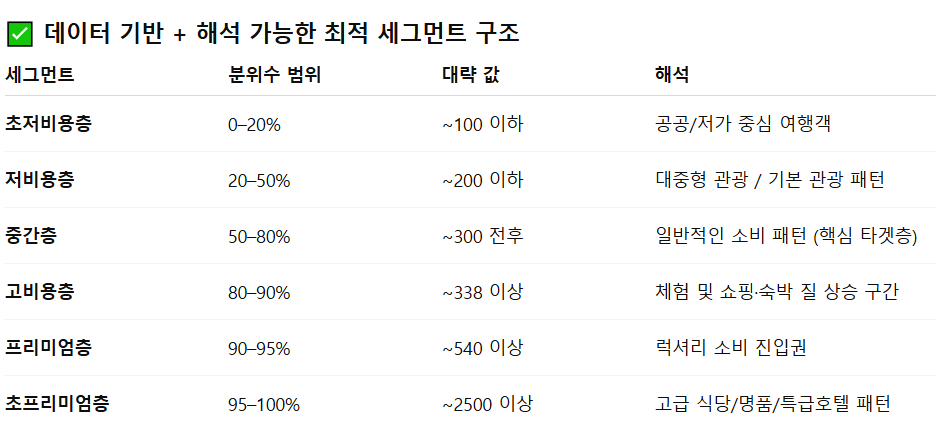

# 2. 총 체제기간

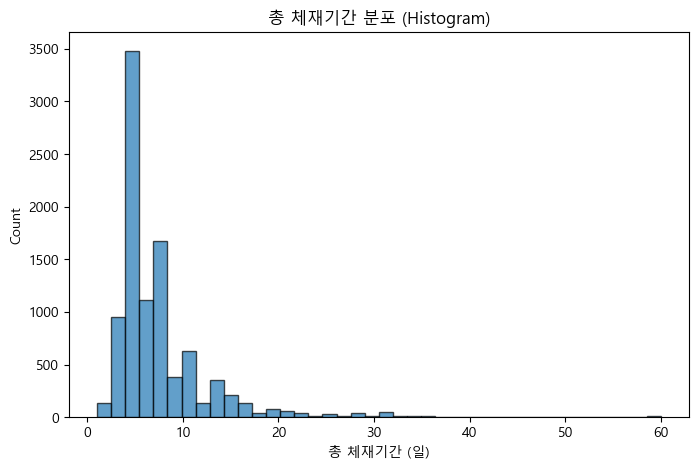

In [69]:
target_col2 = '문9-3. 총 체재기간_61일 이상 결측'

plt.figure(figsize=(8,5))
plt.hist(df[target_col2], bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('총 체재기간 (일)')
plt.ylabel('Count')
plt.title('총 체재기간 분포 (Histogram)')
plt.show()


In [70]:
quantiles = np.arange(0, 1.01, 0.05)   # 0%, 5%, 10%, ..., 100%
q_table2 = df[target_col2].quantile(quantiles)

q_df2 = q_table2.reset_index()
q_df2.columns = ['Quantile', 'Value']
q_df2


,Quantile,Value
0,0.00,1.0
1,0.05,3.0
2,0.10,3.0
3,0.15,4.0
4,0.20,4.0
5,0.25,4.0
6,0.30,5.0
7,0.35,5.0
8,0.40,5.0
9,0.45,5.0


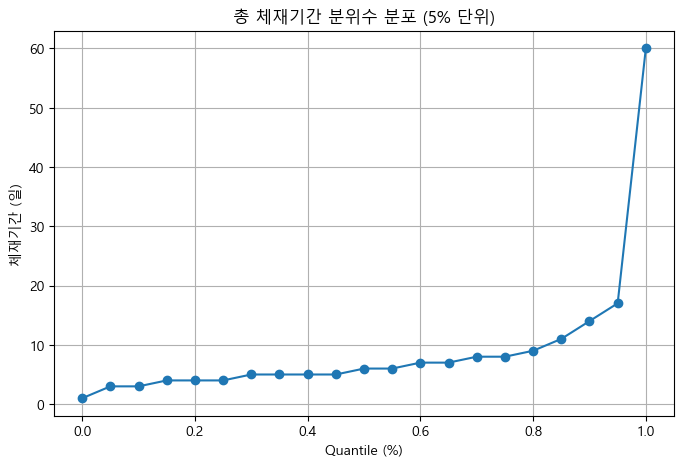

In [71]:
plt.figure(figsize=(8,5))
plt.plot(q_df2['Quantile'], q_df2['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('체재기간 (일)')
plt.title('총 체재기간 분위수 분포 (5% 단위)')
plt.grid(True)
plt.show()

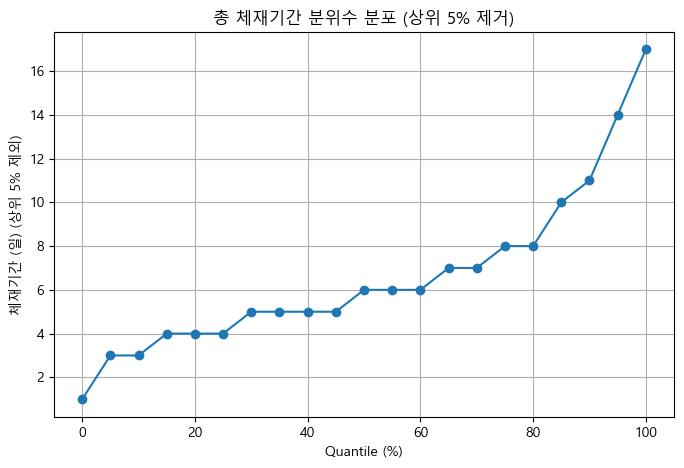

In [72]:
# 상위 5% cutoff
cut2 = df[target_col2].quantile(0.95)

# 상위 5% 제외한 데이터로 재분석
df_trim2 = df[df[target_col2] <= cut2]

quantiles = np.arange(0, 1.01, 0.05)
q_table_trim2 = df_trim2[target_col2].quantile(quantiles)

q_df_trim2 = q_table_trim2.reset_index()
q_df_trim2.columns = ['Quantile', 'Value']
q_df_trim2['Quantile'] = q_df_trim2['Quantile'] * 100  # % 변환

plt.figure(figsize=(8,5))
plt.plot(q_df_trim2['Quantile'], q_df_trim2['Value'], marker='o')
plt.xlabel('Quantile (%)')
plt.ylabel('체재기간 (일) (상위 5% 제외)')
plt.title('총 체재기간 분위수 분포 (상위 5% 제거)')
plt.grid(True)
plt.show()


In [73]:
q = q_df2['Quantile'].values
v = q_df2['Value'].values

# 인접 분위수 간 차이 계산
diff = np.diff(v)      # Value 차이
step = np.diff(q)      # Quantile 차이 (여기서는 전부 5씩 일정)

# 기울기(증가량) = diff / step (step 일정이라 diff로 비교해도 동일)
slope = diff / step

# 구간 테이블 생성
slope_df2 = pd.DataFrame({
    'q_start': q[:-1],
    'q_end': q[1:],
    'v_start': v[:-1],
    'v_end': v[1:],
    'diff': diff,
    'slope': slope
})

# 기울기(절댓값) 큰 순으로 상위 7개 구간 추출
top7_stay = slope_df2.reindex(slope_df2['slope'].abs().sort_values(ascending=False).index).head(7)

top7_stay


,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,17.0,60.0,43.0,860.0
17,0.85,0.90,11.0,14.0,3.0,60.0
18,0.90,0.95,14.0,17.0,3.0,60.0
0,0.00,0.05,1.0,3.0,2.0,40.0
16,0.80,0.85,9.0,11.0,2.0,40.0
9,0.45,0.50,5.0,6.0,1.0,20.0
2,0.10,0.15,3.0,4.0,1.0,20.0


In [74]:
 slope_df2.reindex(slope_df2['slope'].abs().sort_values(ascending=False).index)

,q_start,q_end,v_start,v_end,diff,slope
19,0.95,1.00,17.0,60.0,43.0,860.0
17,0.85,0.90,11.0,14.0,3.0,60.0
18,0.90,0.95,14.0,17.0,3.0,60.0
0,0.00,0.05,1.0,3.0,2.0,40.0
16,0.80,0.85,9.0,11.0,2.0,40.0
9,0.45,0.50,5.0,6.0,1.0,20.0
2,0.10,0.15,3.0,4.0,1.0,20.0
5,0.25,0.30,4.0,5.0,1.0,20.0
11,0.55,0.60,6.0,7.0,1.0,20.0
13,0.65,0.70,7.0,8.0,1.0,20.0


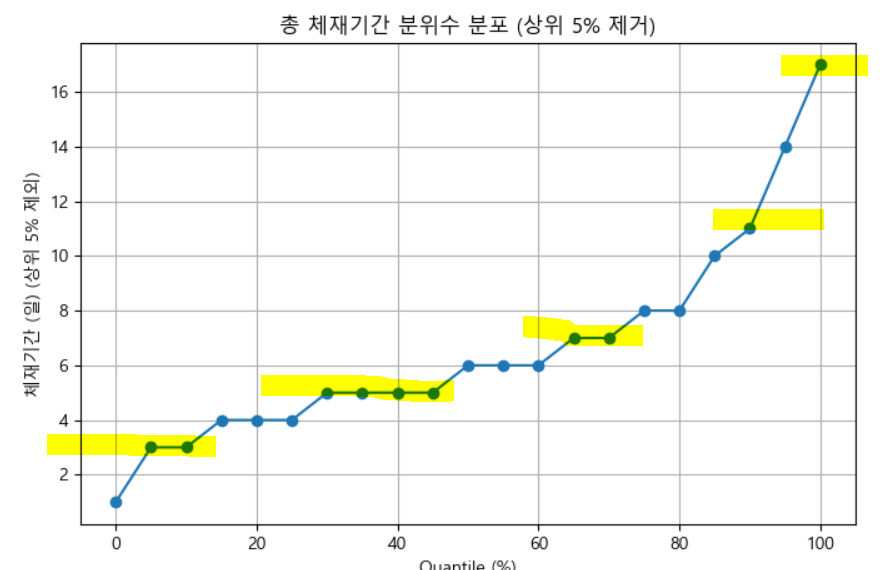

- 1~3일
- 4~5일
- 6~7일
- 8~11일
- 12~17일
- 17일 이상

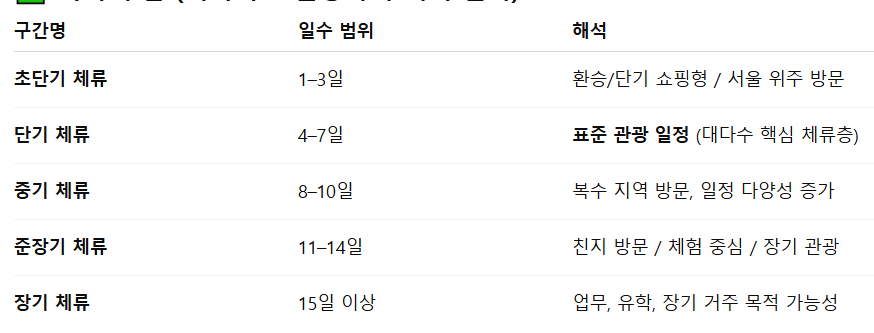

# 3. 항목별 지출경비

In [78]:
import pandas as pd

df1 = pd.read_csv('C:/Users/wndus/OneDrive/바탕 화면/관광지추천/만족도조사.csv', encoding = 'utf-8')
df1 = df1[df1['문1. 주요 방한 목적'] == 1]
df1

,아이디,한국 방문횟수(평균),한국 방문횟수(카테고리),한국 방문횟수(재방문),여행 형태,문1. 주요 방한 목적,문1-1. 한국여행 관심 계기_1순위,문1-1. 한국여행 관심 계기_2순위,문1-1. 한국여행 관심 계기_3순위,문2. 방문을 고려한 아시아 국가_1순위,...,문14. 타인 추천 의향,월별,분기별,국가별,성별,연령별,방한목적별,방한횟수별,여행형태별,가중치
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.099893
5,12.0,1.0,1.0,NaN,1,1,8.0,7.0,NaN,NaN,...,5,1.0,1.0,5.0,2.0,4.0,1.0,1.0,1.0,298.390736
6,14.0,1.0,1.0,NaN,1,1,4.0,5.0,8.0,1.0,...,5,1.0,1.0,8.0,2.0,3.0,1.0,1.0,1.0,130.457228
8,19.0,1.0,1.0,NaN,1,1,1.0,8.0,NaN,NaN,...,5,1.0,1.0,8.0,1.0,5.0,1.0,1.0,1.0,119.056178
9,20.0,1.0,1.0,NaN,1,1,7.0,1.0,9.0,1.0,...,4,1.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,636.214288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16190,21569.0,1.0,1.0,NaN,1,1,5.0,NaN,NaN,NaN,...,5,12.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,844.863617
16191,21570.0,1.0,1.0,NaN,1,1,1.0,9.0,8.0,5.0,...,4,12.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1205.023267
16192,21571.0,1.0,1.0,NaN,1,1,5.0,NaN,NaN,NaN,...,5,12.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,1160.261837
16194,21573.0,2.0,2.0,5.0,1,1,5.0,9.0,4.0,1.0,...,4,12.0,4.0,1.0,2.0,4.0,1.0,2.0,1.0,1220.901706


In [79]:
# 1. df1에서 지출 컬럼 자동 선택
expense_cols = [col for col in df1.columns if col.startswith('문10-1. 항목별 지출경비(상하위 1% 대체)_')]

# 2. ID + 선택된 컬럼만 유지
df1_use = df1[['아이디'] + expense_cols]

# 3. merge
df = df.merge(df1_use, on='아이디', how='left')
df

,Unnamed: 0,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,...,문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_도로 여객운송,문10-1. 항목별 지출경비(상하위 1% 대체)_운송장비 대여서비스,문10-1. 항목별 지출경비(상하위 1% 대체)_유류비,문10-1. 항목별 지출경비(상하위 1% 대체)_문화서비스,문10-1. 항목별 지출경비(상하위 1% 대체)_오락 및 운동관련 서비스,문10-1. 항목별 지출경비(상하위 1% 대체)_쇼핑비,문10-1. 항목별 지출경비(상하위 1% 대체)_데이터 통신비,문10-1. 항목별 지출경비(상하위 1% 대체)_치료 및 건강검진비,문10-1. 항목별 지출경비(상하위 1% 대체)_미용 서비스비,문10-1. 항목별 지출경비(상하위 1% 대체)_기타 비용
0,0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,...,77.20,0.00,0.00,23.16,0.0,386.02,20.07,54.04,0.00,0.0
1,5,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,...,12.81,0.00,0.00,12.81,0.0,512.40,0.00,0.00,0.00,0.0
2,6,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,...,0.00,95.34,31.78,9.08,22.7,90.80,0.00,0.00,0.00,0.0
3,8,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,...,56.75,0.00,0.00,0.00,0.0,340.50,0.00,0.00,0.00,0.0
4,9,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,...,65.20,0.00,0.00,0.00,0.0,326.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,16190,21569.0,1.0,1.0,2.0,1,1.0,5.0,3.0,6.0,...,35.08,0.00,0.00,0.00,0.0,140.30,7.02,0.00,14.03,0.0
9648,16191,21570.0,1.0,1.0,4.0,1,1.0,1.0,12.0,7.0,...,0.00,84.18,0.00,0.00,0.0,140.30,0.00,0.00,0.00,0.0
9649,16192,21571.0,1.0,1.0,3.0,1,1.0,5.0,3.0,1.0,...,0.00,0.00,0.00,0.00,0.0,4209.00,14.03,0.00,0.00,0.0
9650,16194,21573.0,1.0,2.0,4.0,1,2.0,5.0,1.0,1.0,...,0.00,0.00,0.00,0.00,0.0,140.30,7.02,0.00,0.00,0.0


In [80]:
expense_groups = {
    '식비': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_음식점 지출비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_식음료/식재료 구매 비용'
    ],
    
    '여행_가이드': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_여행사에 지불한 경비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_가이드 비용/가이드 팁'
    ],
    
    '숙박': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_숙박비'
    ],
    
    '교통': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_항공비(국적기)',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_항공비(국적기 외)',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_수상 여객운송',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_철도 여객운송',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_한국에서의 교통비_도로 여객운송',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_운송장비 대여서비스',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_유류비'
    ],
    
    '체험_문화': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_문화서비스',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_오락 및 운동관련 서비스'
    ],
    
    '쇼핑': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_쇼핑비'
    ],
    
    '기타': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_데이터 통신비',
        '문10-1. 항목별 지출경비(상하위 1% 대체)_기타 비용'
    ],
    
    '치료': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_치료 및 건강검진비'
    ],
    
    '뷰티_미용': [
        '문10-1. 항목별 지출경비(상하위 1% 대체)_미용 서비스비'
    ]
}


In [81]:
# 그룹별 지출 합 변수 생성
for group, cols in expense_groups.items():
    df[f'총_{group}_지출경비'] = df[cols].sum(axis=1)
    

In [83]:
# 총 국내 지출경비 생성
df['총_국내_지출경비'] = df[[f'총_{g}_지출경비' for g in expense_groups]].sum(axis=1)
df['총_국내_지출경비']

0       1093.20
1       1140.09
2       1430.10
3       1759.25
4       1336.60
         ...   
9647     477.03
9648     925.98
9649    4812.29
9650     357.77
9651     364.78
Name: 총_국내_지출경비, Length: 9652, dtype: float64

In [90]:
# 비율 변수 생성
for group in expense_groups.keys():
    df[f'{group}_비율'] = (df[f'총_{group}_지출경비'] / df['총_국내_지출경비']).round(3)


In [91]:
df

,Unnamed: 0,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,...,총_국내_지출경비,식비_비율,여행_가이드_비율,숙박_비율,교통_비율,체험_문화_비율,쇼핑_비율,기타_비율,치료_비율,뷰티_미용_비율
0,0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,...,1093.20,0.325,0.000,0.113,0.120,0.021,0.353,0.018,0.049,0.000
1,5,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,...,1140.09,0.169,0.000,0.337,0.034,0.011,0.449,0.000,0.000,0.000
2,6,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,...,1430.10,0.159,0.000,0.667,0.089,0.022,0.063,0.000,0.000,0.000
3,8,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,...,1759.25,0.129,0.000,0.258,0.419,0.000,0.194,0.000,0.000,0.000
4,9,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,...,1336.60,0.244,0.146,0.195,0.171,0.000,0.244,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,16190,21569.0,1.0,1.0,2.0,1,1.0,5.0,3.0,6.0,...,477.03,0.441,0.000,0.147,0.074,0.000,0.294,0.015,0.000,0.029
9648,16191,21570.0,1.0,1.0,4.0,1,1.0,1.0,12.0,7.0,...,925.98,0.455,0.000,0.303,0.091,0.000,0.152,0.000,0.000,0.000
9649,16192,21571.0,1.0,1.0,3.0,1,1.0,5.0,3.0,1.0,...,4812.29,0.073,0.006,0.044,0.000,0.000,0.875,0.003,0.000,0.000
9650,16194,21573.0,1.0,2.0,4.0,1,2.0,5.0,1.0,1.0,...,357.77,0.392,0.000,0.196,0.000,0.000,0.392,0.020,0.000,0.000


In [92]:
drop_cols = [col for col in df.columns 
             if col.startswith('문10-1. 항목별 지출경비(상하위 1% 대체)_')]

df = df.drop(columns=drop_cols)
df

,Unnamed: 0,아이디,국가별,성별,연령별,문1. 주요 방한 목적,한국 방문횟수(카테고리),문1-1. 한국여행 관심 계기_1순위,문3-1. 고려한 관광활동_1순위,문3-2. 고려한 관광인프라_1순위,...,총_국내_지출경비,식비_비율,여행_가이드_비율,숙박_비율,교통_비율,체험_문화_비율,쇼핑_비율,기타_비율,치료_비율,뷰티_미용_비율
0,0,6.0,3.0,2.0,2.0,1,4.0,2.0,1.0,6.0,...,1093.20,0.325,0.000,0.113,0.120,0.021,0.353,0.018,0.049,0.000
1,5,12.0,5.0,2.0,4.0,1,1.0,8.0,5.0,5.0,...,1140.09,0.169,0.000,0.337,0.034,0.011,0.449,0.000,0.000,0.000
2,6,14.0,8.0,2.0,3.0,1,1.0,4.0,12.0,1.0,...,1430.10,0.159,0.000,0.667,0.089,0.022,0.063,0.000,0.000,0.000
3,8,19.0,8.0,1.0,5.0,1,1.0,1.0,5.0,4.0,...,1759.25,0.129,0.000,0.258,0.419,0.000,0.194,0.000,0.000,0.000
4,9,20.0,3.0,1.0,2.0,1,1.0,7.0,7.0,10.0,...,1336.60,0.244,0.146,0.195,0.171,0.000,0.244,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,16190,21569.0,1.0,1.0,2.0,1,1.0,5.0,3.0,6.0,...,477.03,0.441,0.000,0.147,0.074,0.000,0.294,0.015,0.000,0.029
9648,16191,21570.0,1.0,1.0,4.0,1,1.0,1.0,12.0,7.0,...,925.98,0.455,0.000,0.303,0.091,0.000,0.152,0.000,0.000,0.000
9649,16192,21571.0,1.0,1.0,3.0,1,1.0,5.0,3.0,1.0,...,4812.29,0.073,0.006,0.044,0.000,0.000,0.875,0.003,0.000,0.000
9650,16194,21573.0,1.0,2.0,4.0,1,2.0,5.0,1.0,1.0,...,357.77,0.392,0.000,0.196,0.000,0.000,0.392,0.020,0.000,0.000
